<a href="https://colab.research.google.com/github/jpdeleon/quicklook/blob/main/notebook/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the next cell to install `quicklook` and its dependencies.

In [ ]:
!pip install -r https://raw.githubusercontent.com/jpdeleon/quicklook/main/requirements.txt
!pip install -e git+https://github.com/jpdeleon/quicklook.git#egg=quicklook

Check if quicklook is installed in your environment.

In [2]:
!python -m pip show quicklook

Name: quicklook
Version: 1.0
Summary: Quicklook lightcurve plot generator
Home-page: https://github.com/jpdeleon/quicklook
Author: Jerome de Leon
Author-email: jpdeleon <jpdeleon.bsap@gmail.com>
License: 
Location: /home/jp/miniconda3/envs/ql/lib/python3.11/site-packages
Editable project location: /home/jp/github/research/project/quicklook
Requires: 
Required-by: 


If you're running this in Google colab, then you might need to restart the kernel before you can import the `quicklook` module successfully.

`quicklook` takes advantage of the [transit method](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/#/2) to find planet 

## Example 1 - Planet around a Sun-like star 

Let's see the TESS lightcurve for WASP-21 and see whether the pipeline can detect the transiting planet [WASP-21b](https://exoplanets.nasa.gov/exoplanet-catalog/5375/wasp-21-b/). Depending on the number of cores in your machine, the cell below will typically take between 10 seconds and a few minutes. 

In [3]:
%matplotlib inline
#import the TessQuickLook class inside the quicklook package
from quicklook import TessQuickLook

#initialize the class by simply supplying the target name
planet = TessQuickLook(target_name="WASP-21")

/home/jp/miniconda3/envs/ql/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/jp/.lightkurve/cache. Please move all the files in the legacy directory /home/jp/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


Generating TQL for WASP-21...
All available lightcurves:
      author         mission  t_exptime
0       SPOC  TESS Sector 56       20.0
1       SPOC  TESS Sector 56      120.0
2  TESS-SPOC  TESS Sector 56      200.0
3        QLP  TESS Sector 56      200.0
Available sectors: [56]

Downloaded SPOC (exp=120.0 s) lc in sector 56.

Querying ephemeris for WASP-21:
epoch: 2459826.311145, 0.0004323943
per: 4.32262294185784, 0.00011471372
dur: 3.36990246699019, 0.034073763

Using wotan's biweight method to flatten raw lc.
Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 38 durations
Searching 16230 data points, 2532 periods from 0.601 to 13.84 days
Using all 8 CPU threads


100%|██████████████████████████████████████████| 2532/2532 periods | 00:15<00:00


Searching for best T0 for period 4.32412 days


Above is the log when initializing the target. It shows theat this target was observed by TESS in [sector 56](https://tess.mit.edu/observations/) in 2022, and there are many flavors of light curves available for this target: SPOC, TESS-SPOC, QLP. By default, `ql` chooses the lightcurve from the most recent sector created by the SPOC pipeline.

Estimating rotation period using Generalized Lomb-Scargle (GLS) periodogram.
No output of frequency error.
Increase frequency range to sample the peak maximum.
Generalized LS - statistical output
-----------------------------------
Number of input points:      18905
Weighted mean of dataset:   nan
Weighted rms of dataset:    nan
Time base:                  27.880613
Number of frequency points:   2769

Maximum power p [ZK]: nan
RMS of residuals:     nan
  Mean weighted internal error:  nan
Best sine frequency:  0.071734 +/- nan
Best sine period:     13.940307 +/- nan
Amplitude:            nan +/- nan
-----------------------------------
lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      436478932      
          default_view         period      
                 label  TIC 436478932      
             ls_method           fast      
frequency_at_m

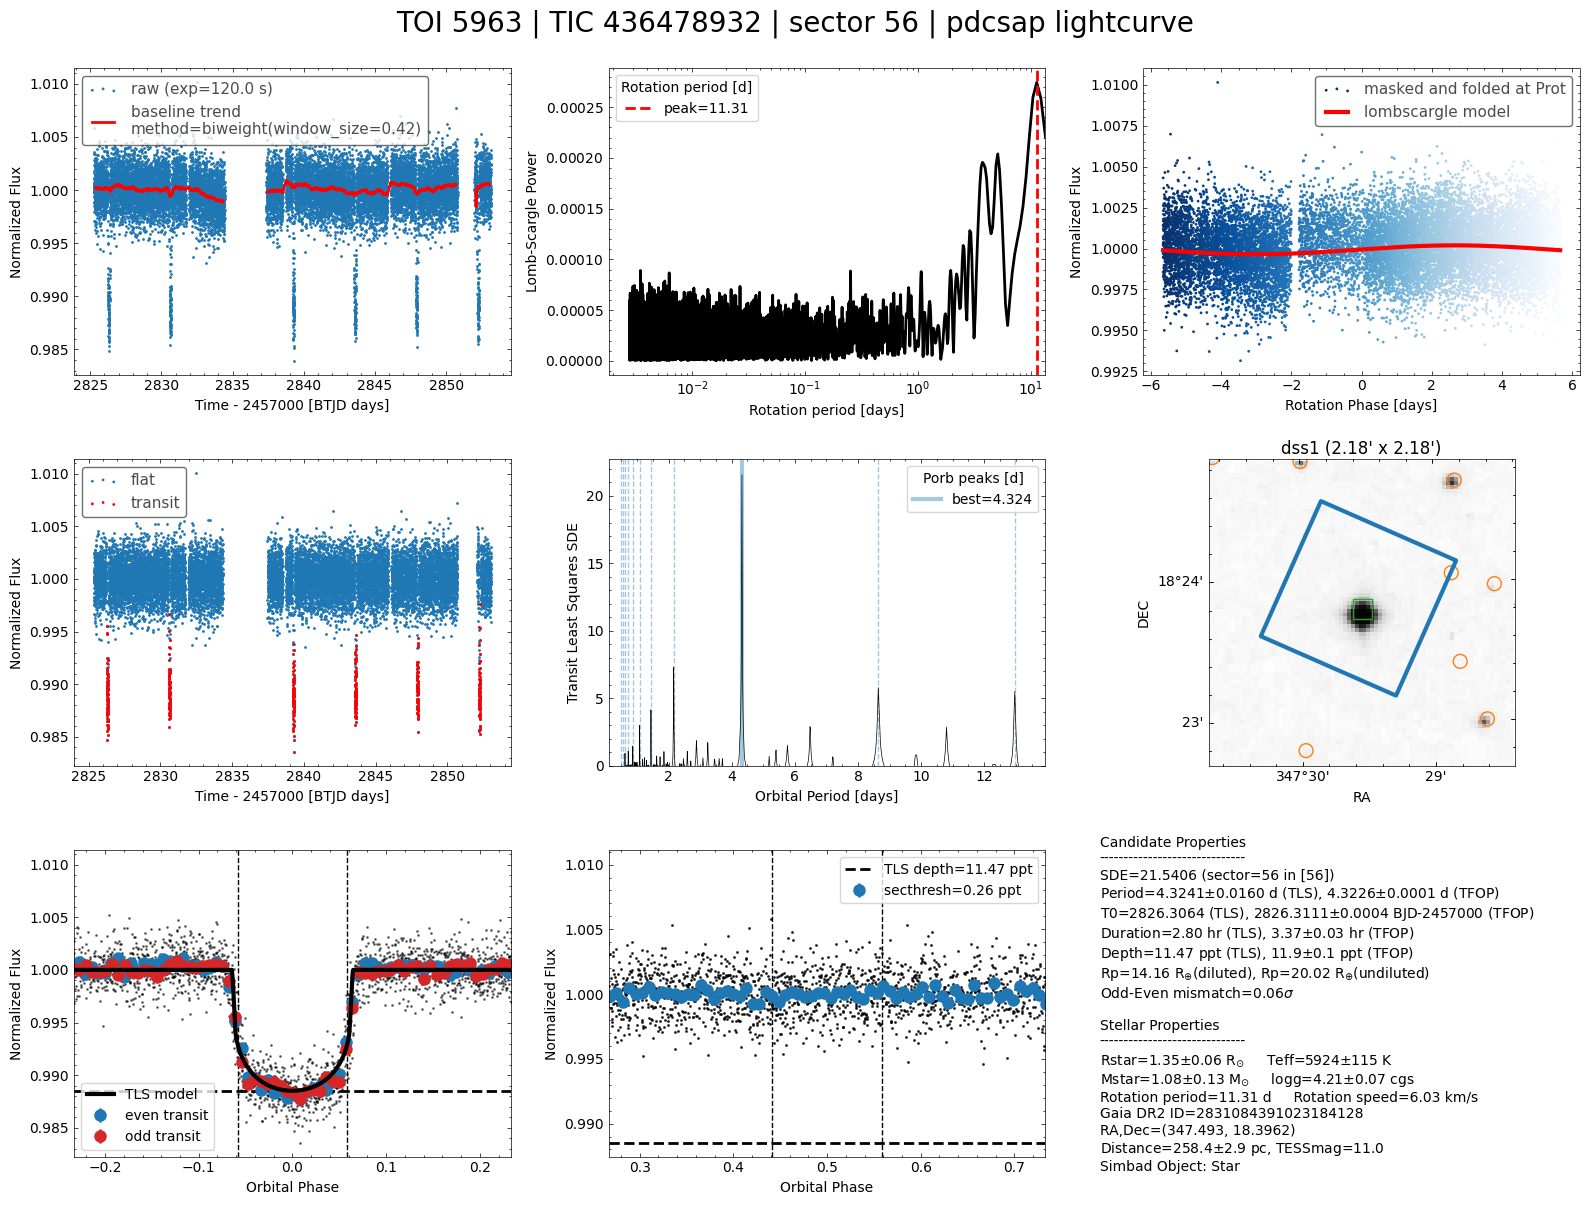

In [4]:
fig = planet.plot_tql()

The figure above shows 9 panels. Let's break them down.
* top row
  - left (panel 1): raw lightcurve (blue marker) and trend (red line)
  - middle (panel 2): [Lomb-Scargle periodogram](https://docs.astropy.org/en/stable/timeseries/lombscargle.html) used to estimate the star's rotation period; this is useful to find active and variable stars
  - right (panel 3): raw lightcurve phase-folded at the computed peak of Lomb-Scargle periodogram (corresponding to the stellar rotation period) from panel 1; 
* middle row
  - left (panel 4): flattened lightcurve and detected transits (determined from the TLS periodogram on panel 5)
  - middle (panel 5): periodogram using the [TLS](https://arxiv.org/abs/1901.02015) algorithm
  - right (panel 6): TESS aperture (blue polygon) and annotated Gaia sources (orange and red markers) overlaid on archival [DSS](https://archive.stsci.edu/cgi-bin/dss_form) image centered on the target; this is useful to see if there are potential sources of the signal other than the target
* bottom row
  - left (panel 7): phase-folded lightcurve at the derived peak of TLS periodogram (corresponding to the orbital period); odd (red markers) and even transits (blue markers) and best-fit transit model (black line) are also shown 
  - middle (panel 8): phase-folded lightcurve zoomed at phase=0.5 to check for a secondary eclipse which is a strong indicator of a self-luminous companion such as an eclipsing binary or a high-albedo brown dwarf; the computed transit depth (dashed line) is shown for reference
  - right (panel 8): summary info about the star and (planet) candidate

Note that you can run the above code in the terminal using the `ql` script:
```
(my_env) $ ql -name "WASP-21" 
```

## Example 2 - Eclipsing Binary (EB)

Let's now see a random target (which turns out to be an eclipsing binary) given a specific [TESS Input Catalog](https://tess.mit.edu/science/tess-input-catalogue/) (TIC) ID.

In [2]:
from quicklook import TessQuickLook

eb = TessQuickLook(target_name="TIC 144539611")

/home/jp/miniconda3/envs/ql/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/jp/.lightkurve/cache. Please move all the files in the legacy directory /home/jp/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


Generating TQL for TIC 144539611...
All available lightcurves:
              author         mission  t_exptime
0               SPOC  TESS Sector 04      120.0
1          TESS-SPOC  TESS Sector 04     1800.0
2                QLP  TESS Sector 04     1800.0
3              TASOC  TESS Sector 04      120.0
4  GSFC-ELEANOR-LITE  TESS Sector 04     1800.0
5              TASOC  TESS Sector 04     1800.0
6              TASOC  TESS Sector 04     1800.0
7               TGLC  TESS Sector 04     1800.0
8                QLP  TESS Sector 31      600.0
Available sectors: [4, 31]

Downloaded SPOC (exp=120.0 s) lc in sector 4.

Using wotan's biweight method to flatten raw lc.
Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 37 durations
Searching 14389 data points, 2286 periods from 0.601 to 12.697 days
Using all 8 CPU threads


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2286/2286 periods | 00:13<00:00


Searching for best T0 for period 1.99081 days


Estimating rotation period using Generalized Lomb-Scargle (GLS) periodogram.
No output of frequency error.
Increase frequency range to sample the peak maximum.
Generalized LS - statistical output
-----------------------------------
Number of input points:      15701
Weighted mean of dataset:   nan
Weighted rms of dataset:    nan
Time base:                  25.947289
Number of frequency points:   2575

Maximum power p [ZK]: nan
RMS of residuals:     nan
  Mean weighted internal error:  nan
Best sine frequency:  0.077079 +/- nan
Best sine period:     12.973644 +/- nan
Amplitude:            nan +/- nan
-----------------------------------
lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      144539611      
          default_view         period      
                 label  TIC 144539611      
             ls_method           fast      
frequency_at_m

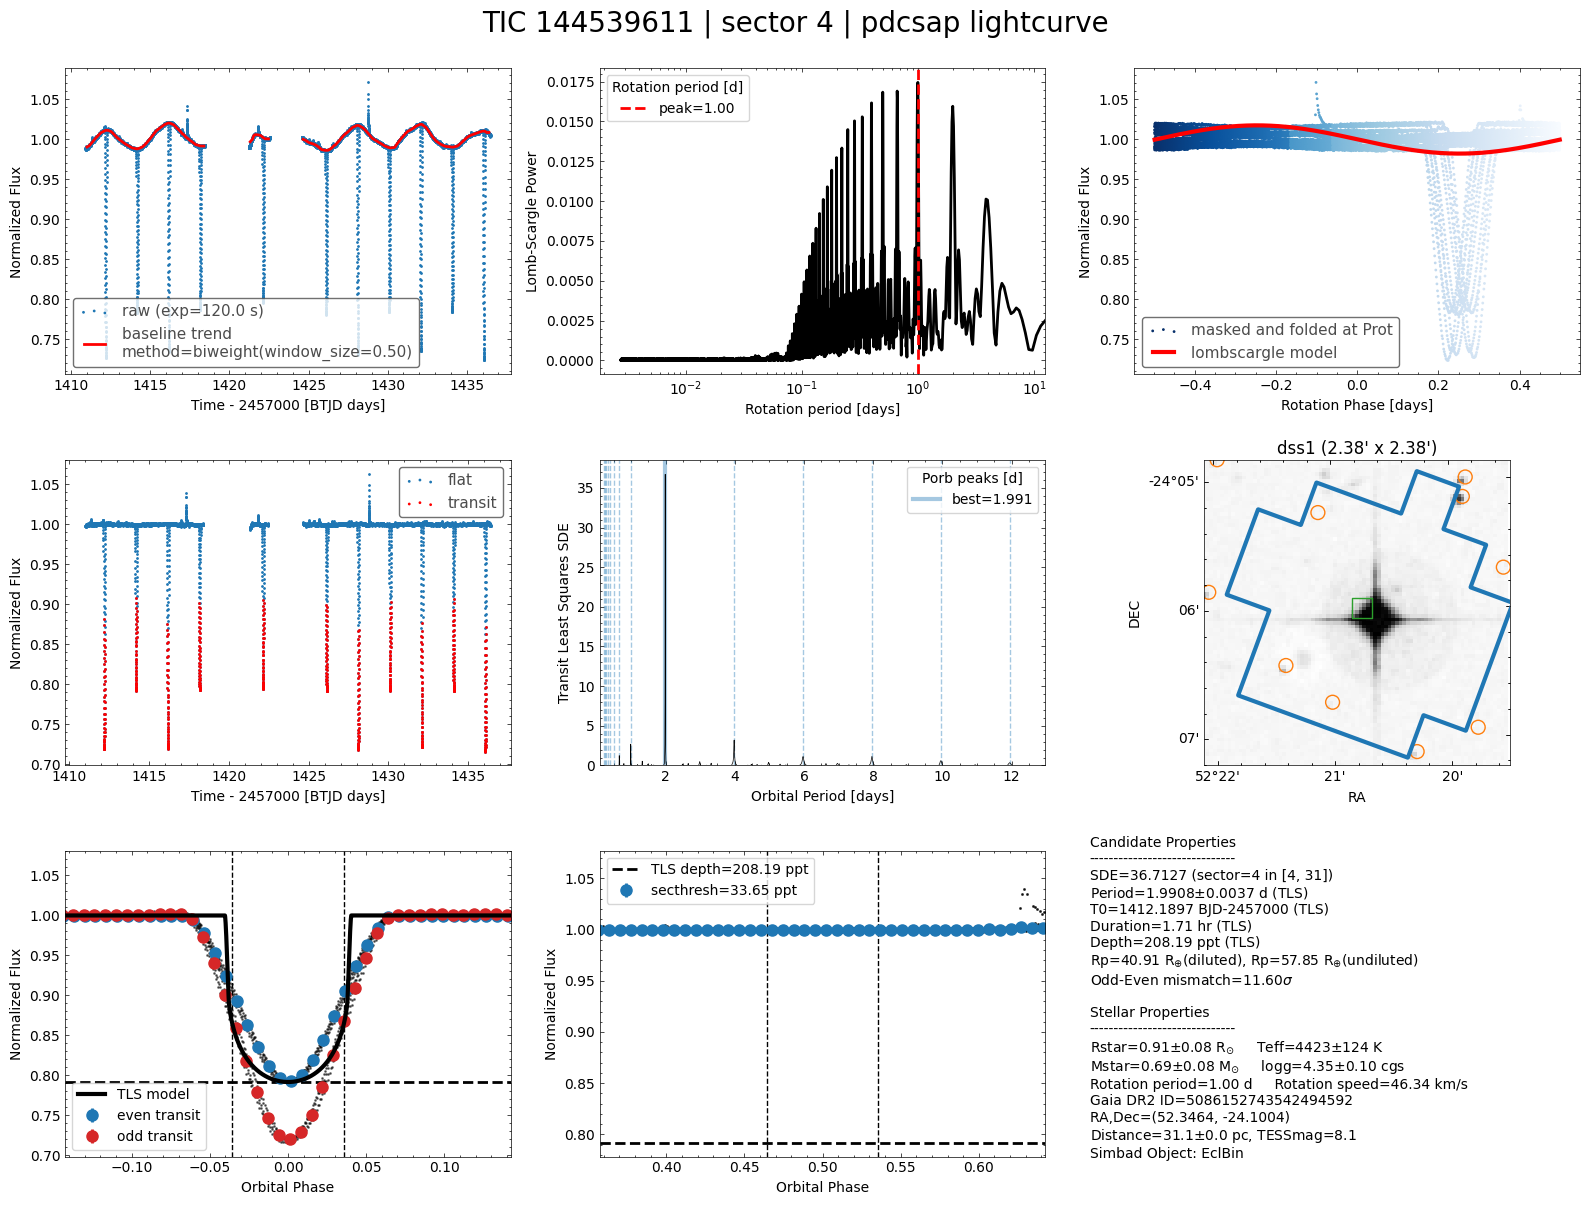

In [3]:
fig = eb.plot_tql()

The reason why this is an EB is because of the typical strong sinusoidal signal (called phase curve) seen in panel 1, the V-shaped signal, and the obvious difference in depth between in odd and even eclipses as seen in panel 7. The actual orbital period of the system is twice the period found by the pipeline:

In [9]:
eb.tls_results.period

1.9908051707342354

If we edit the orbital period:

In [15]:
target.tls_results.period = 1.99*2

and plot again:

lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      144539611      
          default_view         period      
                 label  TIC 144539611      
             ls_method           fast      
frequency_at_max_power         1.0021 1 / d
             max_power         0.0175      
               nyquist       359.9992 1 / d
   period_at_max_power         0.9979     d
             frequency array (46060,) 1 / d
                period array (46060,)     d
                 power array (46060,)      
                  meta <class 'dict'>      
None
All available TPFs:
      author         mission  t_exptime
0       SPOC  TESS Sector 04      120.0
1  TESS-SPOC  TESS Sector 04     1800.0

Using SPOC TPF.

Downloaded SPOC (exp=120.0 s) TPF in sector 4.
Plotting nearby gaia sources on survey image.
Querying Gaia sources around the target.
Querying

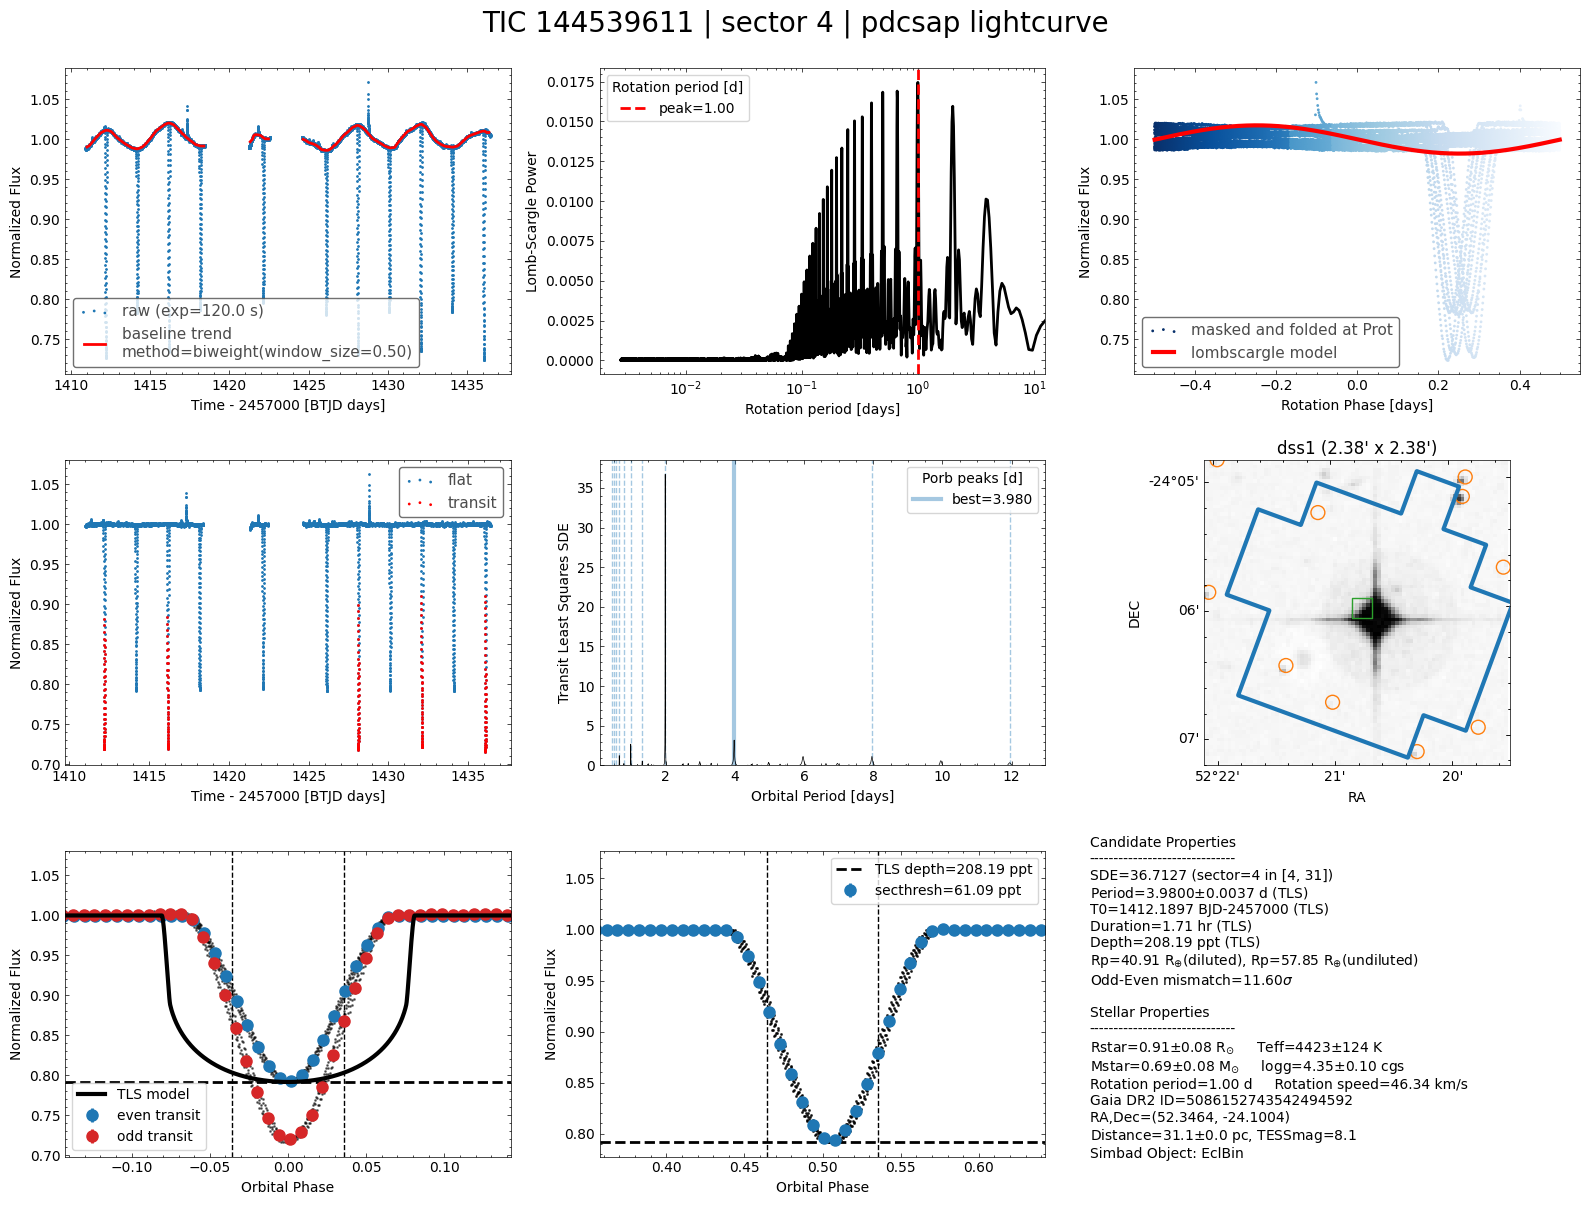

In [16]:
fig = target.plot_tql()

Now we see in panel 4 that primary eclipse is highlighted correctly in red, and also in panel 8 the even/secondary eclipse is zoomed at phase=0.5.

## Example 3 - Brown dwarf

According to this [paper](https://arxiv.org/abs/1906.05048), EPIC 212036875 is a brown dwarf. Although the target was originally observed by the Kepler satellite during the K2 extended mission, it was later observed by TESS. 

In [18]:
bd = TessQuickLook(target_name="EPIC 212036875")

Generating TQL for EPIC 212036875...
All available lightcurves:
      author         mission  t_exptime
0       SPOC  TESS Sector 44      120.0
1  TESS-SPOC  TESS Sector 44      600.0
2        QLP  TESS Sector 44      600.0
3       SPOC  TESS Sector 45      120.0
4  TESS-SPOC  TESS Sector 45      600.0
5        QLP  TESS Sector 45      600.0
6       SPOC  TESS Sector 46      120.0
7  TESS-SPOC  TESS Sector 46      600.0
8        QLP  TESS Sector 46      600.0
9       SPOC  TESS Sector 72      120.0
Available sectors: [44, 45, 46, 72]

Downloaded SPOC (exp=120.0 s) lc in sector 72.

Querying ephemeris for EPIC 212036875:
epoch: 2460280.381301, 0.0139915
per: 5.1699026, 3.11e-05
dur: 1.972, 0.094

Using wotan's biweight method to flatten raw lc.
Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 37 durations
Searching 14408 data points, 2055 periods from 0.601 to 11.61 days
Using all 8 CPU threads


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2055/2055 periods | 00:11<00:00


Searching for best T0 for period 5.16799 days


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11344/11344 [00:02<00:00, 5502.23it/s]


Estimating rotation period using Generalized Lomb-Scargle (GLS) periodogram.
No output of frequency error.
Increase frequency range to sample the peak maximum.
Generalized LS - statistical output
-----------------------------------
Number of input points:      17528
Weighted mean of dataset:   nan
Weighted rms of dataset:    nan
Time base:                  25.324571
Number of frequency points:   2513

Maximum power p [ZK]: nan
RMS of residuals:     nan
  Mean weighted internal error:  nan
Best sine frequency:  0.078737 +/- nan
Best sine period:     12.700483 +/- nan
Amplitude:            nan +/- nan
-----------------------------------
lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      203214138      
          default_view         period      
                 label  TIC 203214138      
             ls_method           fast      
frequency_at_m

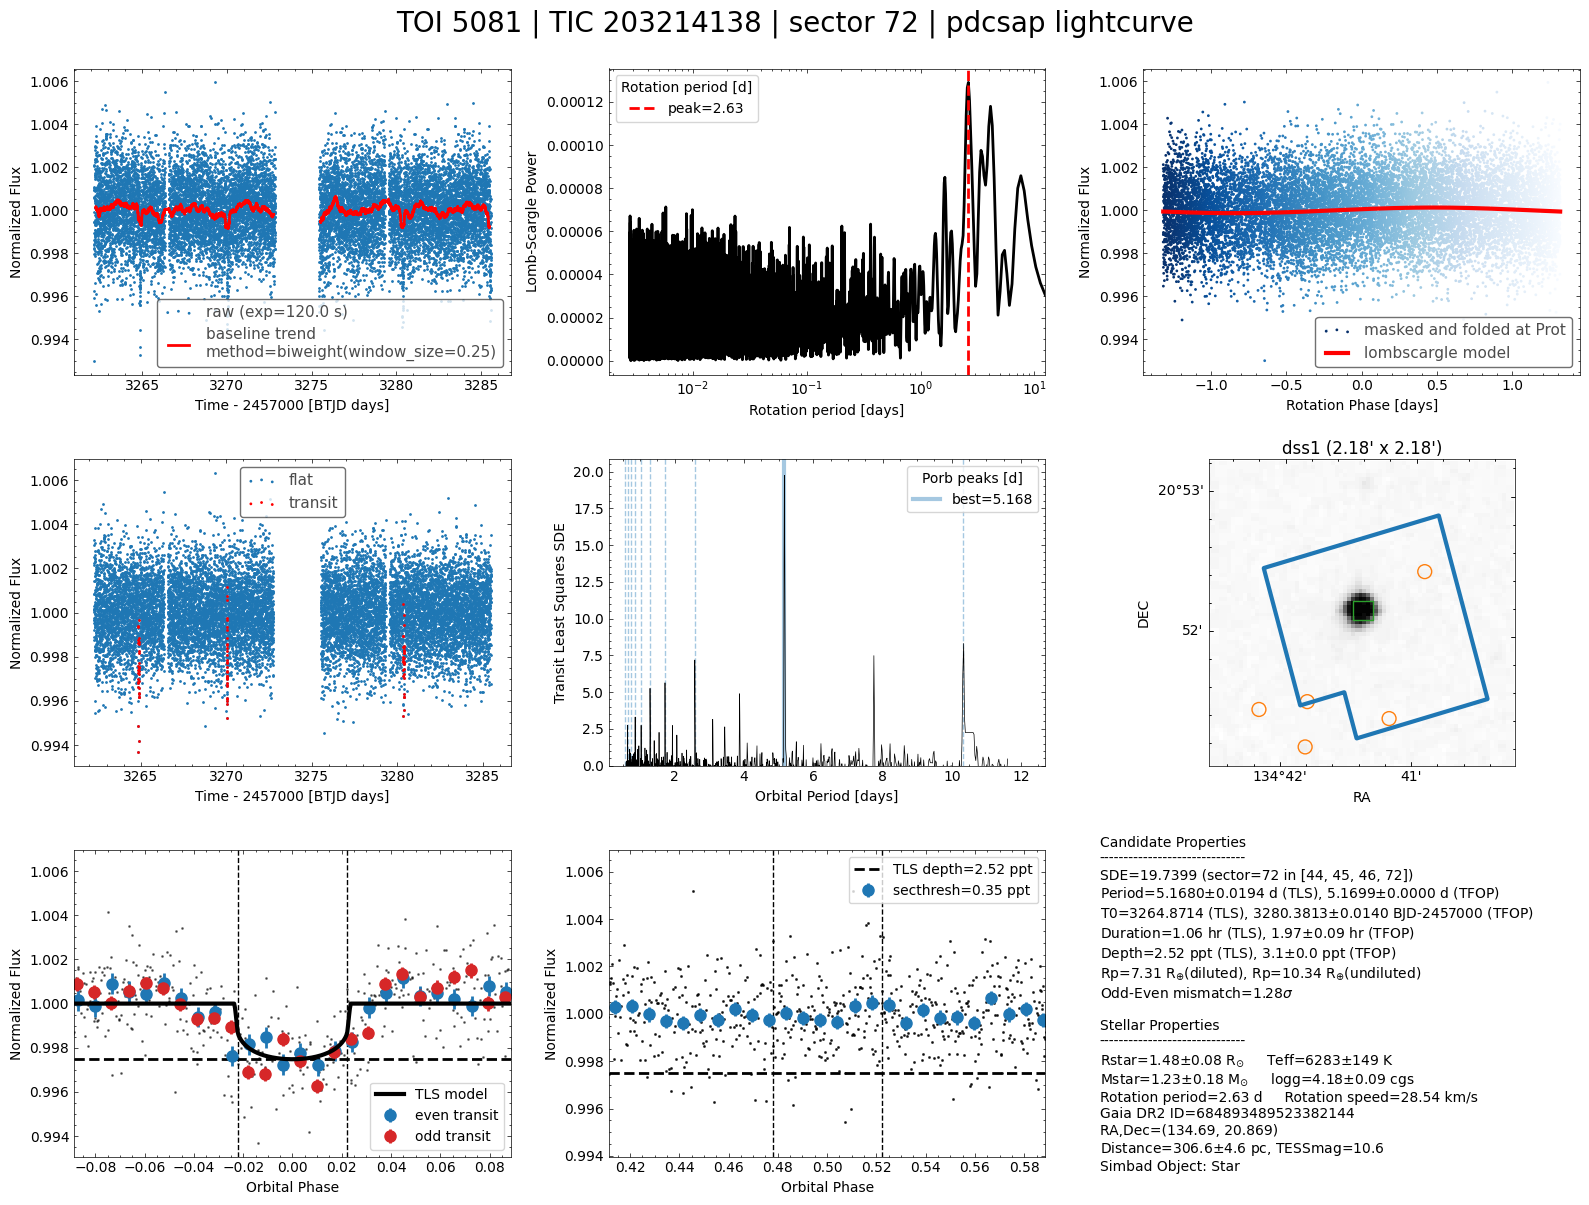

In [19]:
fig = bd.plot_tql()

The paper claims the brown dwarf orbits the star every 5.17 days which is very close to the value we found, shown in panel 5.

## Example 4 - survivor planet around a white dwarf (WD)

According to this NASA article, `WD 1856+534` is a white dwarf hosting a planet that somehow survived its full life cycle.

In [23]:
#wd = TessQuickLook(target_name="WD 1856+534") #`ql` cannot find the target using this name
wd = TessQuickLook(target_name="TIC 267574918") #https://www.nature.com/articles/s41586-020-2713-y identifies the TIC ID

Generating TQL for TIC 267574918...
All available lightcurves:
       author         mission  t_exptime
0        SPOC  TESS Sector 14      120.0
1   TESS-SPOC  TESS Sector 14     1800.0
2        SPOC  TESS Sector 15      120.0
3   TESS-SPOC  TESS Sector 15     1800.0
4        SPOC  TESS Sector 19      120.0
5   TESS-SPOC  TESS Sector 19     1800.0
6        SPOC  TESS Sector 22      120.0
7   TESS-SPOC  TESS Sector 22     1800.0
8        SPOC  TESS Sector 26      120.0
9   TESS-SPOC  TESS Sector 26     1800.0
10       SPOC  TESS Sector 40       20.0
11       SPOC  TESS Sector 40      120.0
12  TESS-SPOC  TESS Sector 40      600.0
13       SPOC  TESS Sector 41       20.0
14       SPOC  TESS Sector 41      120.0
15  TESS-SPOC  TESS Sector 41      600.0
16       SPOC  TESS Sector 49       20.0
17       SPOC  TESS Sector 49      120.0
18  TESS-SPOC  TESS Sector 49      600.0
19       SPOC  TESS Sector 53       20.0
20       SPOC  TESS Sector 53      120.0
21  TESS-SPOC  TESS Sector 53      

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2405/2405 periods | 00:12<00:00


Searching for best T0 for period 1.40859 days


/home/jp/miniconda3/envs/ql/lib/python3.11/site-packages/transitleastsquares/main.py:411: UserWarning: 7 of 19 transits without data. The true period may be twice the given period.
  warnings.warn(text)


In [ ]:
fig = wd.plot_tql()

The [paper](https://arxiv.org/abs/2009.07282) claims the survivor planet orbits the white dwarf every 1.4 days.

## Example 5 - Find a new transiting planet!

You can find your very own planet candidate using `quicklook`. You can focus on areas of the sky where people don't usually search for planets. For references, here's a [visualization](https://jpdeleon.github.io/toi-viz/) of all the planet candidates found by TESS (called TESS Object of Interest or TOI).

Please do notify [me](https://jpdeleon.github.io/aboutme/) when you find anything interesting with `quicklook`. Happy hunting!